In [2]:
#import required libraries for the data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [5]:
df.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [6]:
#replace missing values with mode(). since categorical variable
#fillna(df['Treated_with_drugs'].mode() returns a series object hence use .iloc[0] # ref: https://stackoverflow.com/questions/42789324/pandas-fillna-mode
df['Treated_with_drugs'].fillna(df['Treated_with_drugs'].mode()[0], inplace = True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23097 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [7]:
# To get percentage of missing data in each column
df.isnull().sum() / len(df) * 100

ID_Patient_Care_Situation    0.000000
Diagnosed_Condition          0.000000
Patient_ID                   0.000000
Treated_with_drugs           0.000000
Patient_Age                  0.000000
Patient_Body_Mass_Index      0.000000
Patient_Smoker               0.000000
Patient_Rural_Urban          0.000000
Patient_mental_condition     0.000000
A                            5.347015
B                            5.347015
C                            5.347015
D                            5.347015
E                            5.347015
F                            5.347015
Z                            5.347015
Number_of_prev_cond          5.347015
Survived_1_year              0.000000
dtype: float64

In [8]:
df['Treated_with_drugs'].nunique()

32

In [9]:
df['Treated_with_drugs'].unique()

array(['DX6', 'DX2 ', 'DX1 ', 'DX3 ', 'DX5 ', 'DX4 ', 'DX2 DX5 ',
       'DX2 DX3 ', 'DX1 DX3 ', 'DX1 DX2 ', 'DX3 DX4 ', 'DX1 DX4 ',
       'DX1 DX5 ', 'DX2 DX4 DX5 ', 'DX1 DX2 DX3 ', 'DX3 DX5 ', 'DX2 DX4 ',
       'DX3 DX4 DX5 ', 'DX2 DX3 DX5 ', 'DX1 DX2 DX3 DX4 ', 'DX4 DX5 ',
       'DX2 DX3 DX4 ', 'DX1 DX4 DX5 ', 'DX1 DX2 DX4 ', 'DX1 DX3 DX5 ',
       'DX1 DX2 DX5 ', 'DX1 DX3 DX4 ', 'DX1 DX3 DX4 DX5 ',
       'DX1 DX2 DX4 DX5 ', 'DX2 DX3 DX4 DX5 ', 'DX1 DX2 DX3 DX5 ',
       'DX1 DX2 DX3 DX4 DX5 '], dtype=object)

In [10]:
df['Treated_with_drugs'].value_counts()

DX6                     8619
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX3 DX4                  448
DX1 DX2                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX2 DX3 DX4           24
DX1 DX3 DX4 DX5           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [11]:
#target variable check
df['Survived_1_year'].nunique()

2

In [12]:
df['Survived_1_year'].unique()

array([0, 1], dtype=int64)

In [13]:
df['Survived_1_year'].value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

In [14]:
#dropping null rows
df = df.dropna()

In [15]:
df.shape

(21862, 18)

# EDA

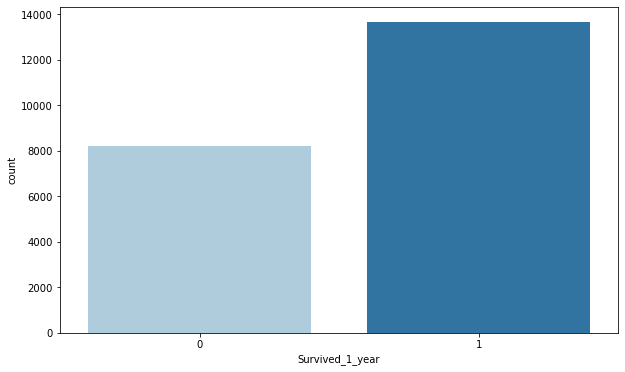

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x= 'Survived_1_year',data= df,palette='Paired')

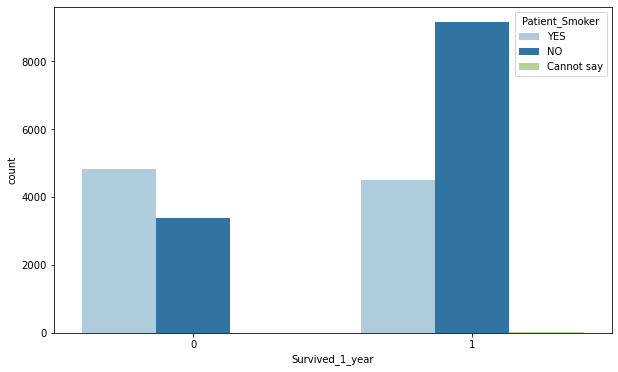

In [17]:
# check relation between survival and the smoking habit
plt.figure(figsize=(10, 6))
sns.countplot(x= 'Survived_1_year',hue='Patient_Smoker',data= df,palette='Paired')

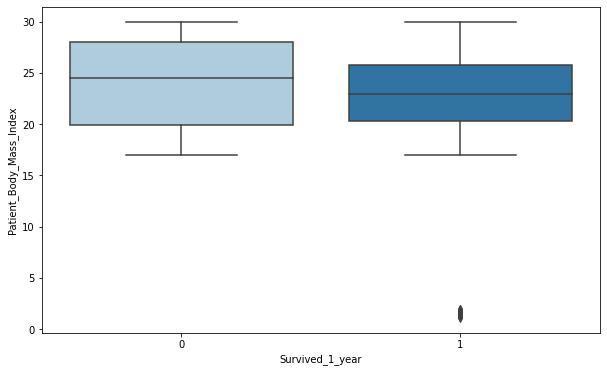

In [18]:
#relation between survival and BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived_1_year',y='Patient_Body_Mass_Index',data=df,palette='Paired')

# Convert categorical data to numerical

In [19]:
#dealing with multiple values column - Treated with drugs
#convert to category dtype
df['Treated_with_drugs'] = df['Treated_with_drugs'].astype('category')

In [20]:
df.dtypes

ID_Patient_Care_Situation       int64
Diagnosed_Condition             int64
Patient_ID                      int64
Treated_with_drugs           category
Patient_Age                     int64
Patient_Body_Mass_Index       float64
Patient_Smoker                 object
Patient_Rural_Urban            object
Patient_mental_condition       object
A                             float64
B                             float64
C                             float64
D                             float64
E                             float64
F                             float64
Z                             float64
Number_of_prev_cond           float64
Survived_1_year                 int64
dtype: object

In [21]:
#use (.cat.codes) to create new colums with encoded values for each unique value in column
df['Treated_with_drugs_cat'] = df['Treated_with_drugs'].cat.codes

In [22]:
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,Treated_with_drugs_cat
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,31
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,16
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,31
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
4,33012,0,12513,DX6,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,31


In [23]:
df.drop('Treated_with_drugs', axis=1, inplace = True)

In [24]:
df= pd.get_dummies(df)

In [25]:
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,...,Z,Number_of_prev_cond,Survived_1_year,Treated_with_drugs_cat,Patient_Smoker_Cannot say,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
0,22374,8,3333,56,18.479385,1.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0,31,0,0,1,0,1,1
1,18164,5,5740,36,22.945566,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,16,0,0,1,1,0,1
2,6283,23,10446,48,27.510027,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0,31,0,0,1,1,0,1
3,5339,51,12011,5,19.130976,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,0,0,1,0,0,1,1
4,33012,0,12513,128,1.348400,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1,31,1,0,0,1,0,1


In [26]:
df.shape

(21862, 21)

In [27]:
df.drop('Patient_mental_condition_Stable', axis = 1,  inplace = True)

In [119]:
df.drop('Patient_ID', axis = 1,  inplace = True)

In [120]:
df.shape

(21862, 19)

In [121]:
X = df.drop('Survived_1_year', axis=1)
y = df['Survived_1_year']

In [122]:
X.drop('Patient_Smoker_Cannot say', axis=1, inplace = True)

In [123]:
X.shape

(21862, 17)

In [124]:
#split dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [125]:
print('X_train:,y_train:',X_train.shape,y_train.shape)

X_train:,y_train: (17489, 17) (17489,)


In [126]:
print('X_test:,y_test:',X_test.shape,y_test.shape)

X_test:,y_test: (4373, 17) (4373,)


# XGBoost Model building

In [127]:
!pip install xgboost

You should consider upgrading via the 'c:\users\csuftitan\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [128]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [129]:
xgb = XGBClassifier(max_depth=6, n_estimators=600, learning_rate=0.05, random_state=0)

In [130]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [131]:
pred_xgb = xgb.predict(X_test)

In [132]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1629
           1       0.86      0.86      0.86      2744

    accuracy                           0.82      4373
   macro avg       0.81      0.81      0.81      4373
weighted avg       0.82      0.82      0.82      4373



In [133]:
print(confusion_matrix(y_test,pred_xgb))

[[1231  398]
 [ 381 2363]]


In [134]:
print(accuracy_score(y_test,pred_xgb))

0.8218614223645095


In [135]:
print(f1_score(y_test,pred_xgb))

0.8584922797456856


# Model tuning

In [136]:
estimator = XGBClassifier(random_state=0)

In [137]:
parameters = {
    'max_depth': [2, 6, 8, 10],
    'n_estimators': [300, 600, 800],
    'learning_rate': [0.1, 0.01, 0.05]
}

In [138]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'f1',
    cv = 5,
    verbose=True
)

In [139]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 46.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     random_state=0, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, ver

In [140]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 800}

In [141]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=800, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [142]:
pred_grid = grid_search.best_estimator_.predict(X_test)

In [143]:
print(classification_report(y_test,pred_grid))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1629
           1       0.85      0.88      0.86      2744

    accuracy                           0.83      4373
   macro avg       0.82      0.81      0.81      4373
weighted avg       0.82      0.83      0.83      4373



In [144]:
print(confusion_matrix(y_test,pred_grid))

[[1206  423]
 [ 337 2407]]


In [145]:
print(accuracy_score(y_test,pred_grid))

0.8262062657214727


In [146]:
print(f1_score(y_test,pred_grid))

0.8636526731252242


# RandomSearchCV 

In [154]:
## Hyper Parameter Optimization

params ={
 "n_estimators": [300,600,800,1000],
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]   
}

In [155]:
Xgb_classifier = XGBClassifier(random_state= 0)

In [156]:
random_search = RandomizedSearchCV(Xgb_classifier,param_distributions=params,
                                   n_iter=5,scoring='f1',n_jobs=-1,cv=5,verbose=3)

In [157]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                              

In [158]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [159]:
random_search.best_params_

{'n_estimators': 600,
 'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.15,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

In [160]:
random_search.best_score_

0.8700530524964167

# Let's test on the unseen data

In [61]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [62]:
df.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Number_of_prev_cond', 'Survived_1_year', 'Treated_with_drugs_cat',
       'Patient_Smoker_Cannot say', 'Patient_Smoker_NO', 'Patient_Smoker_YES',
       'Patient_Rural_Urban_RURAL', 'Patient_Rural_Urban_URBAN'],
      dtype='object')

In [63]:
test_new.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond'],
      dtype='object')

In [64]:
#dealing with multiple values column - Treated with drugs
#convert to category dtype
test_new['Treated_with_drugs'] = test_new['Treated_with_drugs'].astype('category')

In [65]:
#use (.cat.codes) to create new colums with encoded values for each unique value in column
test_new['Treated_with_drugs_cat'] = test_new['Treated_with_drugs'].cat.codes

In [66]:
test_new.drop('Treated_with_drugs', axis=1, inplace = True)

In [161]:
test_new.drop('Patient_ID', axis=1, inplace = True)

In [67]:
test_new= pd.get_dummies(test_new)

In [68]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Treated_with_drugs_cat,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
0,19150,40,3709,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,24,1,0,1,0,1
1,23216,52,986,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,31,1,0,0,1,1
2,11890,50,11821,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,29,1,0,1,0,1
3,7149,32,3292,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,31,1,0,0,1,1
4,22845,20,9959,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24,1,0,1,0,1


In [162]:
test_new.shape

(9303, 17)

In [70]:
test_new.drop('Patient_mental_condition_Stable', axis = 1,  inplace = True)

In [71]:
test_new.shape

(9303, 18)

In [72]:
test_new.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Number_of_prev_cond', 'Treated_with_drugs_cat',
       'Patient_Smoker_NO', 'Patient_Smoker_YES', 'Patient_Rural_Urban_RURAL',
       'Patient_Rural_Urban_URBAN'],
      dtype='object')

In [77]:
X['Patient_Smoker_Cannot say'].value_counts()

0    21849
1       13
Name: Patient_Smoker_Cannot say, dtype: int64

In [113]:
X.shape

(21862, 18)

In [114]:
test_new.shape

(9303, 18)

# Prediction

In [163]:
final = random_search.best_estimator_.predict(test_new)

In [168]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(final)
res.index = test_new.index # its important for comparison
res.columns = ["prediction"]

# To download the csv file locally
res.to_csv('Predictions_xgboost2.csv')         
